In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

spark = SparkSession.builder.getOrCreate()

# Schema
schema = StructType([
    StructField("order_id", StringType()),
    StructField("region", StringType()),
    StructField("category", StringType()),
    StructField("quantity", IntegerType()),
    StructField("price", DoubleType())
])

# Inline data
data = [
    ("O001", "South", "Electronics", 3, 15000.0),
    ("O002", "North", "Clothing", 5, 2000.0),
    ("O003", "East", "Furniture", 2, 12000.0),
    ("O004", "West", "Electronics", 1, 18000.0),
    ("O005", "North", "Furniture", 4, 9000.0),
    ("O006", "South", "Clothing", 6, 2500.0),
    ("O007", "East", "Electronics", 2, 17000.0)
]

df = spark.createDataFrame(data, schema)
df.show()

+--------+------+-----------+--------+-------+
|order_id|region|   category|quantity|  price|
+--------+------+-----------+--------+-------+
|    O001| South|Electronics|       3|15000.0|
|    O002| North|   Clothing|       5| 2000.0|
|    O003|  East|  Furniture|       2|12000.0|
|    O004|  West|Electronics|       1|18000.0|
|    O005| North|  Furniture|       4| 9000.0|
|    O006| South|   Clothing|       6| 2500.0|
|    O007|  East|Electronics|       2|17000.0|
+--------+------+-----------+--------+-------+



In [11]:
from pyspark.sql.functions import col,sum,avg,count

df  = df.withColumn("revenue",col("quantity")* col("price"))

category_summary = df.groupBy("category").agg(
    sum("quantity").alias("total_quantity"),
    sum("revenue").alias("total_revenue"),
    avg("revenue").alias("avg_order_value")
)
category_summary.show()

region_summary = df.groupBy("region").agg(
    count("*").alias("total_orders"),
    sum("revenue").alias("total_revenue")
)
region_summary.show()

+-----------+--------------+-------------+------------------+
|   category|total_quantity|total_revenue|   avg_order_value|
+-----------+--------------+-------------+------------------+
|Electronics|             6|      97000.0|32333.333333333332|
|   Clothing|            11|      25000.0|           12500.0|
|  Furniture|             6|      60000.0|           30000.0|
+-----------+--------------+-------------+------------------+

+------+------------+-------------+
|region|total_orders|total_revenue|
+------+------------+-------------+
| South|           2|      60000.0|
|  East|           2|      58000.0|
| North|           2|      46000.0|
|  West|           1|      18000.0|
+------+------------+-------------+



In [12]:

display(category_summary)
display(region_summary)

DataFrame[category: string, total_quantity: bigint, total_revenue: double, avg_order_value: double]

DataFrame[region: string, total_orders: bigint, total_revenue: double]

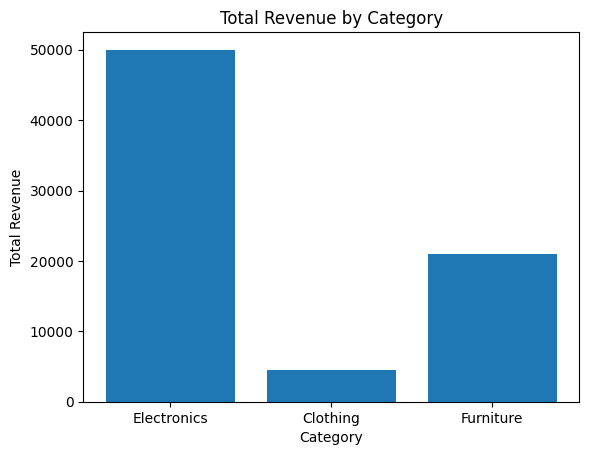

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pdf = category_summary.toPandas()

plt.bar(pdf['category'], pdf['total_revenue'])
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Category')
plt.show()

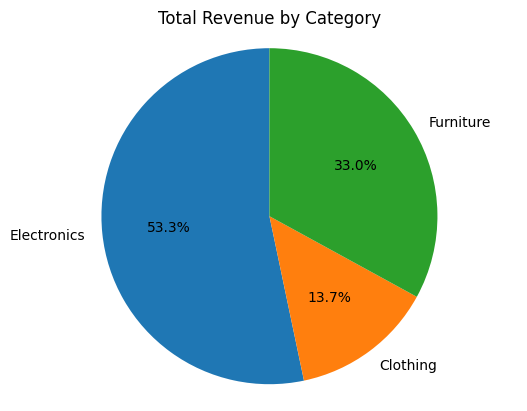

In [13]:

import matplotlib.pyplot as plt
import pandas as pd

# Convert to pandas for matplotlib
pdf = category_summary.toPandas()

# Create pie chart
plt.pie(
    pdf["total_revenue"],
    labels=pdf["category"],
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Total Revenue by Category")
plt.axis("equal")
plt.show()


*scatter plot*

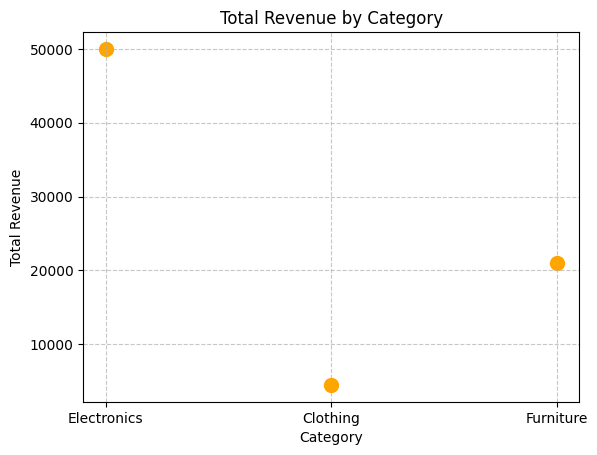

In [10]:
from pyspark.sql.functions import sum
import pandas as pd
import matplotlib.pyplot as plt

# Summarize total revenue by category
category_summary = df.groupBy("category").agg(sum("price").alias("total_revenue"))

# Convert Spark DataFrame to Pandas DataFrame
pdf = category_summary.toPandas()

# Scatter plot
plt.scatter(pdf['category'], pdf['total_revenue'], color='orange', s=100)
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Category')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
